In [4]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
 

In [5]:
train = pd.read_csv('train.csv')


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Install missingno:

import missingno as msno

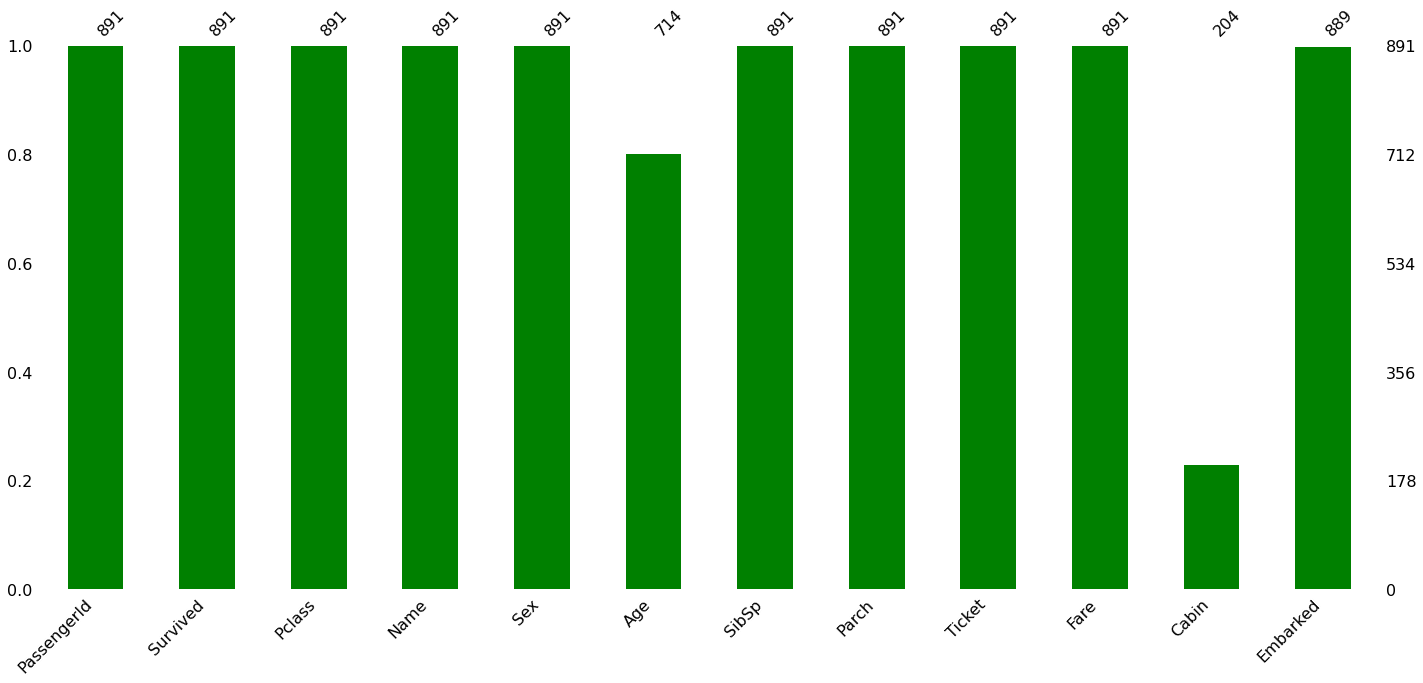

In [9]:
# Bar chart of missing values:

msno.bar(train, color='green');

In [10]:
# Above chart descirbes percentage(x1) and count(x2) of records for each variable(y1).

# The variable 'Cabin' has the most missing values at 204 of 891 populated records (missing 77% of records).

In [11]:
# Drop records where 'Embakred' is null:

train = train.dropna(subset=['Embarked'])

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [13]:
# Fill empty cabin values with '¯\_(ツ)_/¯'

train['Cabin'] = train['Cabin'].fillna('¯\_(ツ)_/¯')


In [14]:
# Create 'FamilyCount' as sum of sibling/spouse count and number of parents/children aboard:
# Adding 1 to this sum to account for lone travelers. This way, 'FamilyCount' represents the entire family size.

train['FamilyCount'] = train['SibSp'] + train['Parch'] + 1

In [15]:
# Create binary variable for Reverend:
# Code adapted from pandas.pydata.org: df[df['A'].str.contains('string')]

train['IsReverend'] = train['Name'].str.contains('Rev', na=False)

In [16]:
# Create Indicator Variables for variables 'Embarked' and 'Sex':

train = pd.get_dummies(train, columns=['Embarked'])
train = pd.get_dummies(train, columns=['Sex'])

In [17]:
# BONUS:
# Extract the title from everyone's name and create dummy columns

train['Title'] = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]

In [407]:
# Overal Survival Rate:
# This calculation assumes each ticket represents one person.

#sum(train['Survived'])/sum(train['FamilyCount'])
sum(train['Survived'])/train['PassengerId'].nunique()


0.38245219347581555

In [408]:
# Male and Female Survival Rates:

train.groupby('Sex_male').mean()

# Male: 19%
# Female: 74%

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female
Sex_male,,,,,,,,,,,,,
0,430.932692,0.740385,2.166667,27.745174,0.698718,0.653846,44.252124,2.352564,0.000000,0.233974,0.115385,0.650641,1.0
1,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,1.665511,0.010399,0.164645,0.071057,0.764298,0.0


In [409]:
# Class Survival Rates:

train.groupby('Pclass').mean()

# 1: 62%
# 2: 47%
# 3: 25%

,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
Pclass,,,,,,,,,,,,,
1,461.742991,0.626168,38.105543,0.420561,0.359813,84.193516,1.780374,0.000000,0.397196,0.009346,0.593458,0.429907,0.570093
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,1.782609,0.032609,0.092391,0.016304,0.891304,0.413043,0.586957
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,2.008147,0.000000,0.134420,0.146640,0.718941,0.293279,0.706721


In [410]:
# Reverend Survival Rate:

train.groupby('IsReverend').mean()

# Reverend: 0%

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
IsReverend,,,,,,,,,,,,,
False,445.730464,0.385051,2.313703,29.527153,0.526614,0.383918,32.190345,1.910532,0.19026,0.086070,0.723669,0.353341,0.646659
True,485.666667,0.000000,2.000000,43.166667,0.166667,0.166667,18.312500,1.333333,0.00000,0.166667,0.833333,0.000000,1.000000


In [411]:
# ¯\_(ツ)_/¯ Cabn Survival Rate:

train.groupby('Cabin').mean()

# ¯\_(ツ)_/¯: 30%

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
Cabin,,,,,,,,,,,,,,
A10,584.000000,0.000000,1.00000,36.000000,0.000000,0.000000,40.125000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
A14,476.000000,0.000000,1.00000,NaN,0.000000,0.000000,52.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
A16,557.000000,1.000000,1.00000,48.000000,1.000000,0.000000,39.600000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
A19,285.000000,0.000000,1.00000,NaN,0.000000,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
A20,600.000000,1.000000,1.00000,49.000000,1.000000,0.000000,56.929200,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F38,777.000000,0.000000,3.00000,NaN,0.000000,0.000000,7.750000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
F4,401.500000,1.000000,2.00000,2.500000,2.000000,1.000000,39.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000
G6,216.000000,0.500000,3.00000,14.750000,0.500000,1.250000,13.581250,2.750000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000


In [412]:
#Survival Rate for those with no listed age: 

train['Age'].isnull().groupby(train['Survived']).mean()

# No Listed Age: 15%

Survived
0    0.227687
1    0.152941
Name: Age, dtype: float64

In [413]:
# Survival rate for each Embarkment Location:

# C: 55%
# Q: 39%
# S: 34%

#train.groupby('Embarked_C').mean()
#train.groupby('Embarked_Q').mean()
train.groupby('Embarked_S').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Sex_female,Sex_male
Embarked_S,,,,,,,,,,,,,
0,436.726531,0.502041,2.208163,30.331772,0.400000,0.302041,45.283880,1.702041,0.004082,0.685714,0.314286,0.444898,0.555102
1,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812,1.984472,0.007764,0.000000,0.000000,0.315217,0.684783


In [414]:
# Survival Rate for children (under 12) in each 'Pclass':

# Under 12 mask
under_twelve = train['Age'] < 12 

train[under_twelve].groupby('Pclass')['Survived'].mean()

# 1: 75%
# 2: 100%
# 3: 40%

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [415]:
# Did the captain survive? Is he on the list?

train[train['Name'].str.contains('Capt')]

# Did not survive, but is on the list.

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
745,746,0,1,"Crosby, Capt. Edward Gifford",70.0,1,1,WE/P 5735,71.0,B22,3,False,0,0,1,0,1


In [416]:
# Of those who died, who paid the most for a ticket?:

#died = train['Survived'] == 0
#train[died]['Fare'].max()

#train['Fare'].max().where(train['Survived']==0)

train.groupby(['Survived'], sort=False)['Fare'].max()

Survived
0    263.0000
1    512.3292
Name: Fare, dtype: float64

In [358]:
train['Fare'].sort_values()

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
341    263.0000
88     263.0000
737    512.3292
679    512.3292
258    512.3292
Name: Fare, Length: 889, dtype: float64

In [393]:
# Family on boat help or hurt chances of survival?

# Show survival rates by family count

train.groupby('FamilyCount')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
FamilyCount,,,,,,,,
1,535.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,161.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Plotting Survival Rates by Group:

In [ ]:
# Survival Rate by Gender 

In [ ]:
# Survival Rate by Age Group

In [ ]:
# Survival Rate by Passenger Class

In [ ]:
# Survival Rate by Ticket Fare

In [ ]:
df_train['Title'] = [i.split(',')[1].split('.')[0].strip() for i in df_train['Name']]